<a href="https://colab.research.google.com/github/abhi-11nav/Spotify-data-Analysis/blob/main/Spotify_Music_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spotify Data Analysis

### Dataset credits:

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [1]:
import numpy as np 
import pandas as pd

In [2]:
!git clone https://github.com/abhi-11nav/Spotify-data-Analysis.git

Cloning into 'Spotify-data-Analysis'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [3]:
data = pd.read_csv("/content/Spotify-data-Analysis/dataset.csv")

In [4]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Dropping unnecessary columns

data.drop("Unnamed: 0", inplace=True, axis=1)

In [6]:
# Columns/ Feature names

data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [7]:
# Data description 

data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [9]:
data.shape

(114000, 20)

### * Let us pick explore about the categorical variables

In [10]:
# Filtering the categorical columns

categorical_columns  = []

for i in data.columns:
  if type(data[i][0]) == str:
    categorical_columns.append(i)

In [11]:
categorical_columns

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [12]:
# First let us check for any missing values

for cols in categorical_columns:
  if data[cols].isna().any() == True:
    print(cols," --> Contains missing values")

artists  --> Contains missing values
album_name  --> Contains missing values
track_name  --> Contains missing values


In [13]:
# Exploring the data further for missing values
data.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [14]:
# Since there are only 1 missing value, we can drop those rows/columns

data.dropna(inplace=True)

In [15]:
data.isna().any()

track_id            False
artists             False
album_name          False
track_name          False
popularity          False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
track_genre         False
dtype: bool

In [16]:
print("Total data length:", len(data))

for cols in categorical_columns:
  length = len(data[cols].value_counts())
  print(length, " is the uniqe value count in", cols,"-->", round((length/len(data))*100,2),"%")

Total data length: 113999
89740  is the uniqe value count in track_id --> 78.72 %
31437  is the uniqe value count in artists --> 27.58 %
46589  is the uniqe value count in album_name --> 40.87 %
73608  is the uniqe value count in track_name --> 64.57 %
114  is the uniqe value count in track_genre --> 0.1 %


In [17]:
# We are going to elimnate the track_id,track_name and album_name because of so many unique values (over 40 percent)

# Copy of removed values
copy = data[["track_id","album_name","track_name"]]
for col in copy.columns:
  categorical_columns.remove(col)

data.drop(["track_id","album_name","track_name"],inplace=True, axis=1)

In [18]:
for col in categorical_columns:
  print(col,"\n",data[col].value_counts()[:10],"\n\n")

artists 
 The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: artists, dtype: int64 


track_genre 
 acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
Name: track_genre, dtype: int64 




In [19]:
data[data['artists'] == "OneRepublic"]['track_genre'].value_counts()

piano    124
rock      55
pop        2
Name: track_genre, dtype: int64

We can observe that **One Republic** songs are mostly of the genre **piano**, followed by **rock** and **pop** ∇
We will create a list of popular genres for every artist

In [20]:
# Gathering all the unique artist names

artists = []

for i in data['artists'].value_counts().index:
  artists.append(i)

# **DO NOT EXECTUE - EXECUTED FILE SAVED ALREADY** 

In [ ]:
# Empty dicitonary to be update with artist and famous genre list. 

from tqdm import tqdm

artists_famous_genre = {}

for value in tqdm(artists):
  famous_genre = data[data["artists"]==value]['track_genre'].value_counts().index[0]

  artists_famous_genre.update({
      value : famous_genre
  })

In [ ]:
# Saving the dictionary to a csv file 

artists_genre = pd.DataFrame(artists_famous_genre.values(),artists_famous_genre.keys(), columns=['genre']).reset_index()
artists_genre['artists'] = artists_genre["index"]
artists_genre.drop("index",axis=1,inplace=True)

artists_genre.to_csv("artists_famous_genre.csv")

.

## NUMERICAL DATA ANALYSIS

In [21]:
numerical_columns = []

for i in data.columns:
  if i not in categorical_columns:
    numerical_columns.append(i)

In [22]:
# Correlation matrix 

data.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
explicit,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387
danceability,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,0.050420,-0.003475,0.108587,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,-0.013948,-0.035581,-0.037216,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.044930,-0.062605,0.307951,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011
acousticness,-0.025458,-0.103770,-0.094400,-0.171531,-0.733908,-0.040942,-0.589804,0.095568,-0.002184,1.000000,0.104033,-0.020693,-0.107081,-0.208231,-0.176142


In [23]:
# Importing viusalization libraries 

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

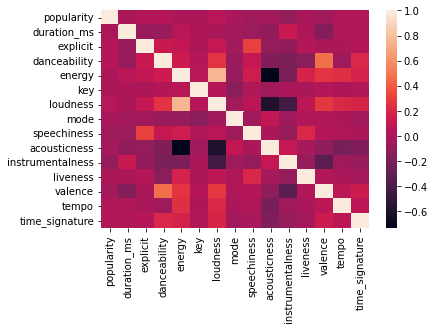

In [24]:
fig = sns.heatmap(data.corr())

Well, there are a three columns that gather our interest - acousticness, loudness, energy 

Let us explore the realation between these models in detail 

In [25]:
print("Correlation matrix --> acousticness and loudness")
print(np.corrcoef(data["acousticness"], data["loudness"]))


Correlation matrix --> acousticness and loudness
[[ 1.         -0.58980374]
 [-0.58980374  1.        ]]


In [26]:
print("Correlation matrix --> acousticness and energy")
print(np.corrcoef(data["acousticness"], data["energy"]))

Correlation matrix --> acousticness and energy
[[ 1.         -0.73390829]
 [-0.73390829  1.        ]]


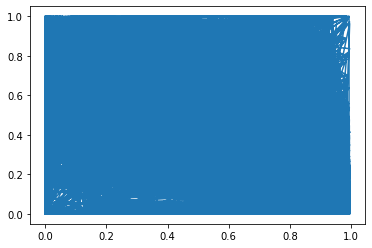

<Figure size 720x1080 with 0 Axes>

In [27]:
plt.plot(data["acousticness"], data["energy"])
plt.figure(figsize=(10,15))
plt.show() 

# This graph shows us that there is no storng correlation between the features. 

In [28]:
"""
# Let us categorise the popularity variable and perform some analysis

data["popular"] = data["popularity"]


indexes = data[data["popular"]>=50]["popular"].index
indexes2 = data[data["popular"]<50]["popular"].index

for i in indexes:
  data.iloc[i,len(data.columns)-1] = "Yes"
for i in indexes2:
  data.iloc[i,len(data.columns)-1] = "No"

  """

'\n# Let us categorise the popularity variable and perform some analysis\n\ndata["popular"] = data["popularity"]\n\n\nindexes = data[data["popular"]>=50]["popular"].index\nindexes2 = data[data["popular"]<50]["popular"].index\n\nfor i in indexes:\n  data.iloc[i,len(data.columns)-1] = "Yes"\nfor i in indexes2:\n  data.iloc[i,len(data.columns)-1] = "No"\n\n  '

In [29]:
#sns.scatter(data[][:10000],data[][:10000], hue=data["popular"])

## DISTRIBUTION PLOTS (All the numerical variables)

In [30]:
numerical_columns

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


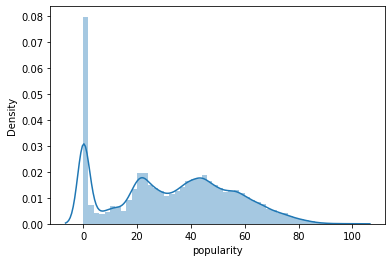

In [31]:
sns.distplot(data["popularity"])

**DISTRIBUTION PLOT FOR "duration_ms"**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


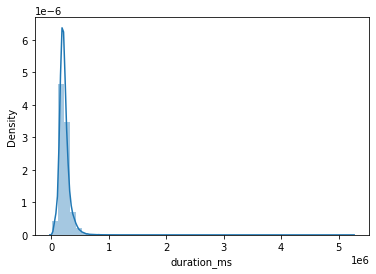

In [32]:
sns.distplot(data["duration_ms"])

**DISTRIBUTION PLOT FOR "liveness"**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


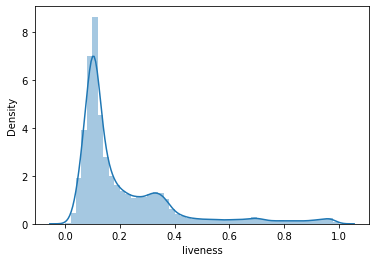

In [33]:
sns.distplot(data["liveness"])

None of the features explored until now seem to follow a normal distribution 

**DISTRIBUTION PLOT FOR "danceability"**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


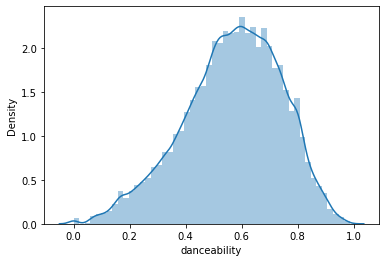

In [34]:
sns.distplot(data["danceability"])

Danceability feature seems to follow a normal distribution. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


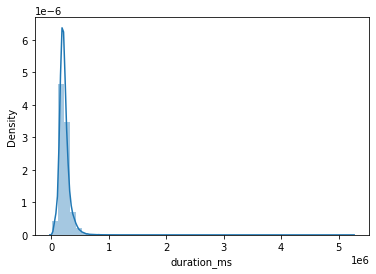

In [35]:
sns.distplot(data["duration_ms"])

Extremely skewed to the right. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


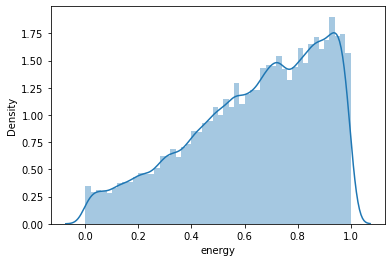

In [36]:
sns.distplot(data["energy"])

A bit inclined towards the left | cannot assumed to be a normal distribution 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


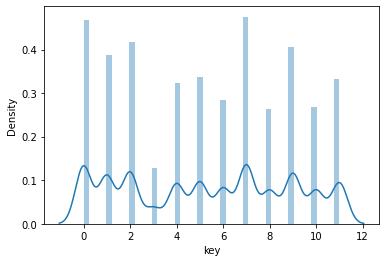

In [37]:
sns.distplot(data["key"])

# This does seem like a categorical columns. Well, it actually is. Let us dig into this feature later. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


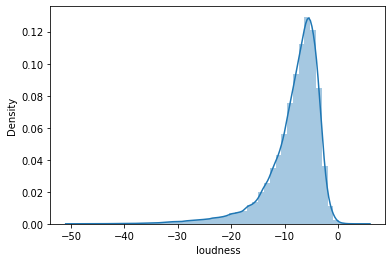

In [38]:
sns.distplot(data["loudness"])

Comments: Clearly skewed to the left

In [39]:
data["mode"].value_counts()

# Well, this is a categorical column too.

"""
mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
Expalantion given from the source 
"""

'\nmode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0\nExpalantion given from the source \n'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


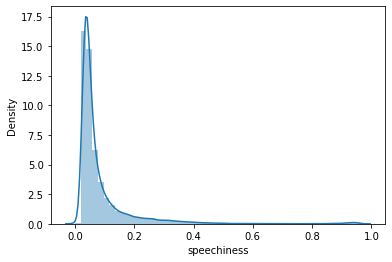

In [40]:
sns.distplot(data["speechiness"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


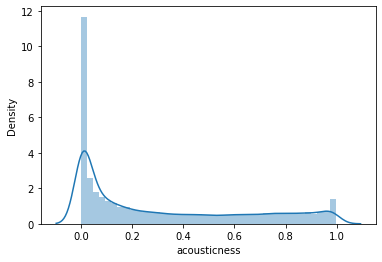

In [41]:
sns.distplot(data["acousticness"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


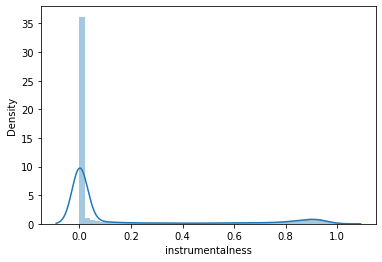

In [42]:
sns.distplot(data["instrumentalness"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


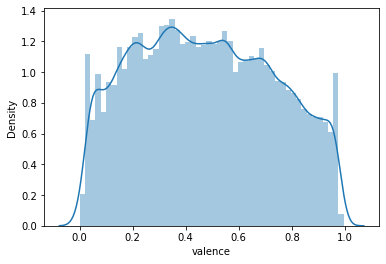

In [43]:
sns.distplot(data["valence"])

This seems to be normalyy distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


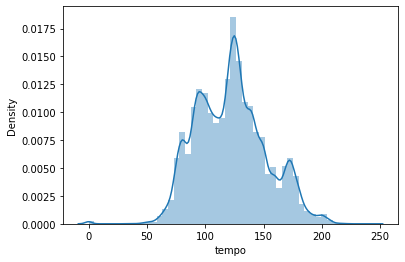

In [44]:
sns.distplot(data["tempo"])

The tempo feature also seems to be normally distirbuted/

Since most of the data is not normally distributed,  we are initially going to perform non-aprametrical stastical test. 

**CHI SQUARE TEST**

In [45]:
categorical_columns

['artists', 'track_genre']

## **ONE WAY ANOVE TEST**

We will check if different keys (ranging from 1-10 affect the popularity/danceability of the songs)

In [46]:
# means of popularity for different key value

popularity_means = []

for val in data["key"].unique():
  popularity_means.append(data[data["key"]==val]["popularity"].mean())
  print("Key:",val,"-->",data[data["key"]==val]["popularity"].mean())

Key: 1 --> 33.20024136650576
Key: 0 --> 32.51994487405252
Key: 2 --> 34.3776193747853
Key: 6 --> 33.58553212978159
Key: 11 --> 33.88763197586727
Key: 8 --> 32.958695652173915
Key: 4 --> 34.64365008880995
Key: 7 --> 32.58207490184235
Key: 3 --> 33.03165266106443
Key: 10 --> 32.46137339055794
Key: 5 --> 32.93093509820666
Key: 9 --> 32.823565809246


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


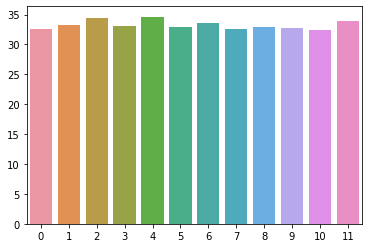

In [47]:
# Visual representations of the mean 

sns.barplot(data["key"].unique(), popularity_means)
sns.set(rc={'figure.figsize':(10,6)})

In [48]:
# means of popularity for different key value

danceability_means = []

for val in data["key"].unique():
  danceability_means.append(data[data["key"]==val]["danceability"].mean())
  print("Key:",val,"-->",data[data["key"]==val]["danceability"].mean())

Key: 1 --> 0.5778813126624582
Key: 0 --> 0.560807939667713
Key: 2 --> 0.544977902782549
Key: 6 --> 0.5806644994318898
Key: 11 --> 0.5896483731954321
Key: 8 --> 0.5804415760869565
Key: 4 --> 0.5561941496447601
Key: 7 --> 0.5642306704922985
Key: 3 --> 0.5474511764705883
Key: 10 --> 0.5787872183476395
Key: 5 --> 0.5668971712211786
Key: 9 --> 0.5578825510474675


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


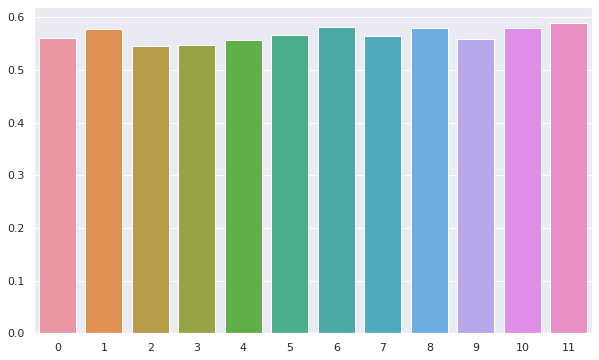

In [49]:
# Visual representations of the mean 

sns.barplot(data["key"].unique(), danceability_means)
sns.set(rc={'figure.figsize':(10,6)})

We are going to verify if the means are statistically significant.

The question goes to : does change in the category of "key faeature" ranging from (0 upto 11) change the popularity of the song

### HYPOTHESIS

#### NULL HYPTOHESES (H0): The population means for different categories of key are equal

#### ALTERNATE HYPOTHESIS (H1) : The population means are differnet, atleast between two categories.

Significance value:  0.05

Assumptions for the test : One assumption for ANOVA test is that the distribution of the data is normal. We will check if the data is normally distributed or we will transform the data to be normally distributed 

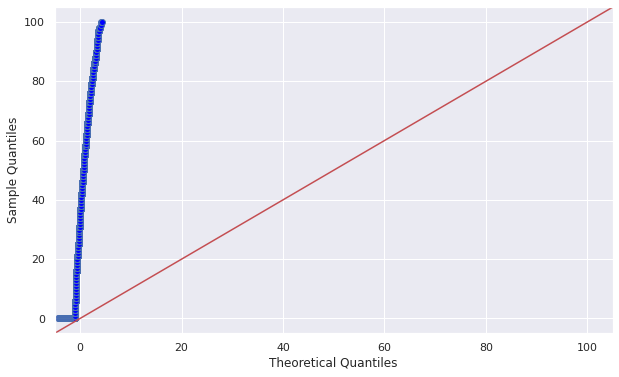

In [50]:
# Library imports for qqplots and other visualisations 

import statsmodels.api as sm 
import pylab 

sm.qqplot(data["popularity"], line='45')
pylab.show()

The dat is not noramlly distributed since it isn't following the line of qqplot plotted above. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


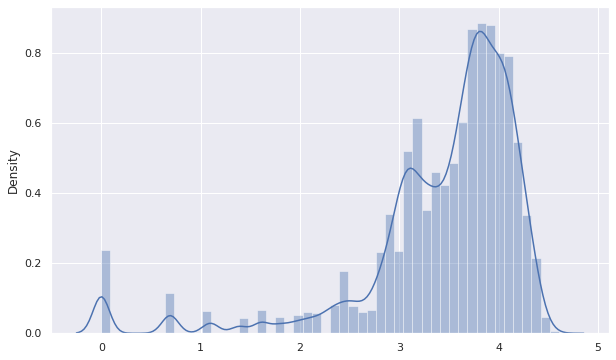

In [51]:
# Applying log transformation to the data to make it normally distributed

sns.distplot(np.log([y for y in data["popularity"] if y!=0]))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


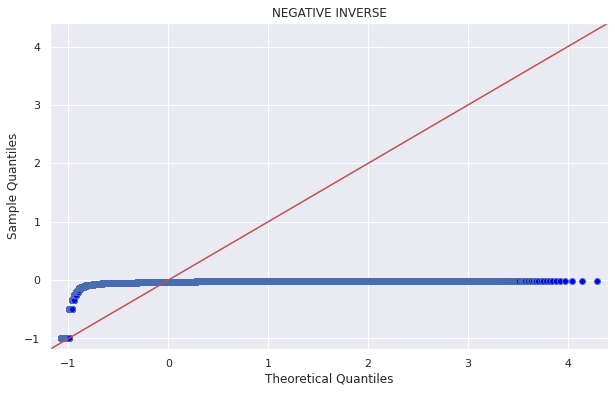

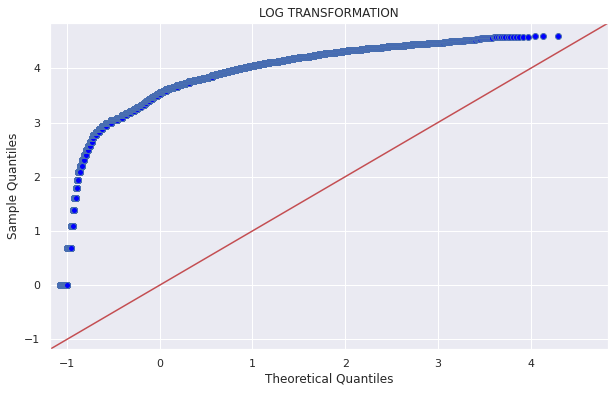

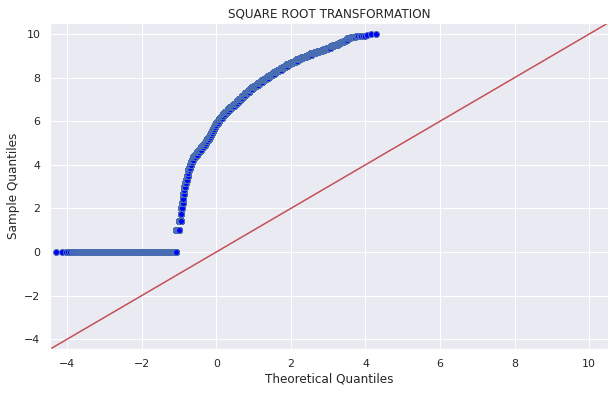

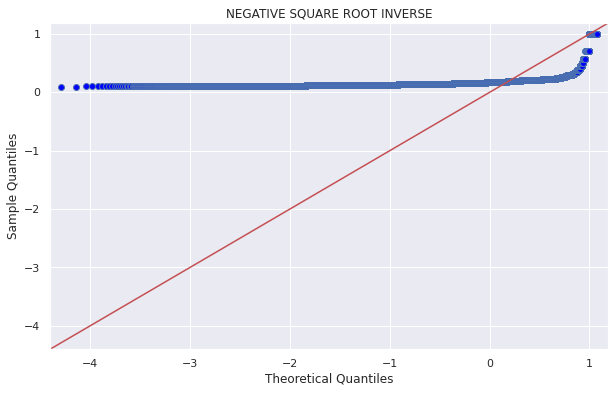

In [52]:
sm.qqplot(-1/(data["popularity"]), line='45')
plt.title("NEGATIVE INVERSE")

sm.qqplot(np.log(data["popularity"]), line='45')
plt.title("LOG TRANSFORMATION")

sm.qqplot(np.sqrt(data["popularity"]), line='45')
plt.title("SQUARE ROOT TRANSFORMATION")

sm.qqplot(1/np.sqrt(data["popularity"]), line='45')
plt.title("NEGATIVE SQUARE ROOT INVERSE")
pylab.show()

#### Since the transformation is not outputting a normal distribution. We will go ahead with "danceability feature"

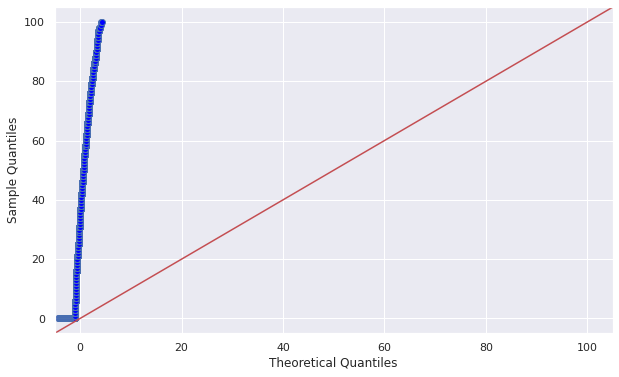

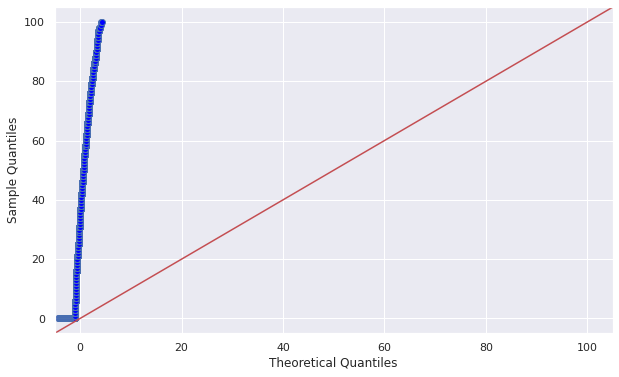

In [53]:
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
scaler = StandardScaler()

sm.qqplot(data["popularity"], line='45')

The prob plot verifies normality of danceability values for us. 

In [54]:
# Printing the unique values for convenience of reference. 

data["key"].unique()

array([ 1,  0,  2,  6, 11,  8,  4,  7,  3, 10,  5,  9])

In [55]:
# Grouping the data according to categories

group0_val = [x for x in data[data["key"]==0]['danceability']]
group1_val = [x for x in data[data["key"]==1]['danceability']]
group2_val = [x for x in data[data["key"]==2]['danceability']]
group3_val = [x for x in data[data["key"]==3]['danceability']]
group4_val = [x for x in data[data["key"]==4]['danceability']]
group5_val = [x for x in data[data["key"]==5]['danceability']]
group6_val = [x for x in data[data["key"]==6]['danceability']]
group7_val = [x for x in data[data["key"]==7]['danceability']]
group8_val = [x for x in data[data["key"]==8]['danceability']]
group9_val = [x for x in data[data["key"]==9]['danceability']]
group10_val = [x for x in data[data["key"]==10]['danceability']]
group11_val = [x for x in data[data["key"]==11]['danceability']]

In [56]:
# Importing libraries for one way anova test
import scipy.stats 
from scipy.stats import f_oneway

statistic, p_value = f_oneway(group0_val,group1_val,group2_val,group3_val,group4_val,group5_val,group6_val,group7_val,group8_val,group9_val,group10_val,group11_val)

print("Test Result:\n Anova test statistic:",statistic,"pvalue:",p_value)

if p_value <0.05:
  print("We can reject the null hypothesis as enough evidence is present")
else:
  print("We cannot reject the null hypothesis as enough evidence supports the nulll hypothesis")

Test Result:
 Anova test statistic: 59.13920491796844 pvalue: 5.268874796291882e-132
We can reject the null hypothesis as enough evidence is present


Since the pvalue is less than 0.05 (our significance value). We reject the null hypothesis. To conclude, there is enough evidence to reject that populations means of danceability feature for difference categories of key are equal

#### Let us explore about the music that's explicit and non-explicit

In [57]:
danceability_means = []

print("VALUE COUNTS:\n",data['explicit'].value_counts(),'\n')

for cols in numerical_columns:
  print("\n",cols)
  for val in data["explicit"].unique():
    print(val,"-->",data[data["explicit"]==val][cols].mean())

VALUE COUNTS:
 False    104252
True       9747
Name: explicit, dtype: int64 


 popularity
False --> 32.93820742048114
True --> 36.4541910331384

 duration_ms
False --> 230172.50744350228
True --> 205127.65045655073

 explicit
False --> 0.0
True --> 1.0

 danceability
False --> 0.5602999894486438
True --> 0.63633035805889

 energy
False --> 0.6339265256992672
True --> 0.7211391505078485

 key
False --> 5.30424356367264
True --> 5.361341951369652

 loudness
False --> -8.42593674941488
True --> -6.472890530419616

 mode
False --> 0.6430284311092354
True --> 0.5790499640915153

 speechiness
False --> 0.07469636841499443
True --> 0.19113927362265312

 acousticness
False --> 0.3245048718502283
True --> 0.21224738099825585

 instrumentalness
False --> 0.16583843812473623
True --> 0.051365585291884674

 liveness
False --> 0.21165942917162264
True --> 0.23381859033548788

 valence
False --> 0.47433372818746894
True --> 0.4712018569816354

 tempo
False --> 122.17349757318803
True --> 121.871713

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


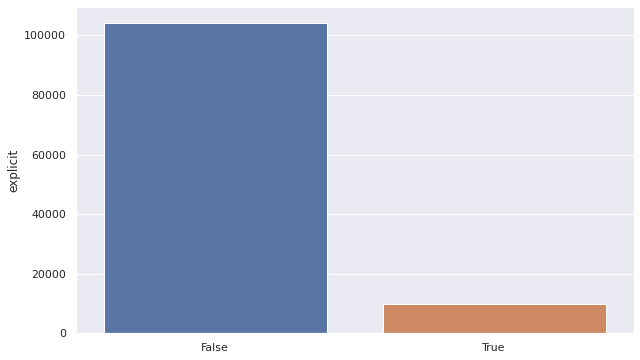

In [58]:
sns.barplot(data['explicit'].value_counts().index,data['explicit'].value_counts())

In [59]:
# Since the values are imabalanced. Let us pick out a samples from "False" to balance it with True

# defining sample_size
sample_size = 9000

# Gathering samples from data 
f_data = data[data["explicit"]==False].sample(n=sample_size)
t_data = data[data['explicit']==True].sample(n=sample_size)

# Combining gathered samples
testing_data  = pd.concat([f_data,t_data])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


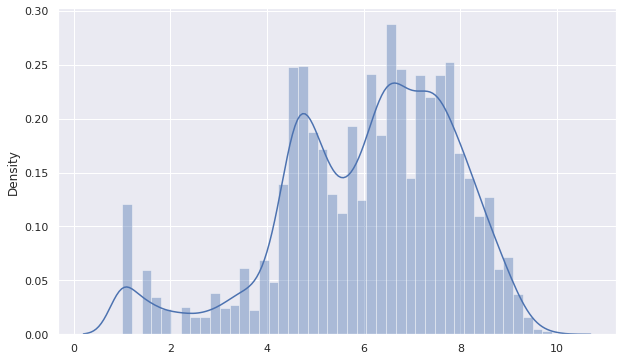

In [60]:
# Prining the means of data in collected samples
transformed_pop_data = [np.sqrt(x) for x in testing_data['popularity'] if x!=0]

sns.distplot(transformed_pop_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


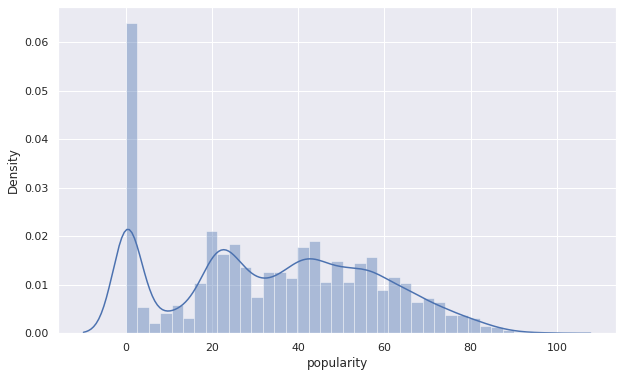

In [61]:
sns.distplot(testing_data["popularity"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


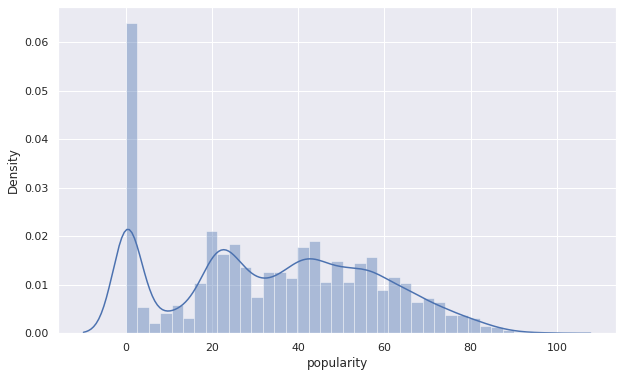

In [62]:
sns.distplot(testing_data["popularity"])

#### EXPLICIT - YES : DISTRIBUTION 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


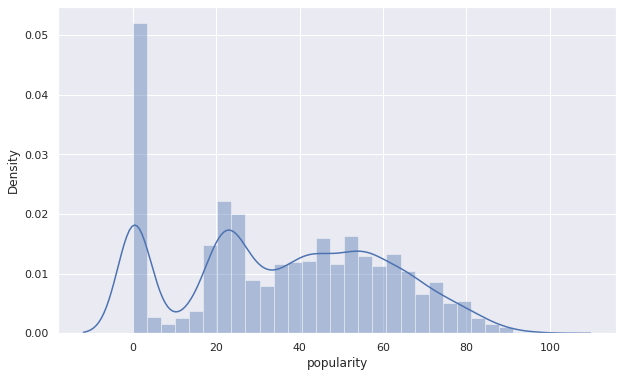

In [63]:
sns.distplot(testing_data[testing_data["explicit"]==True]['popularity'])

#### EXPLICIT - NO : DISTRIBUTION 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


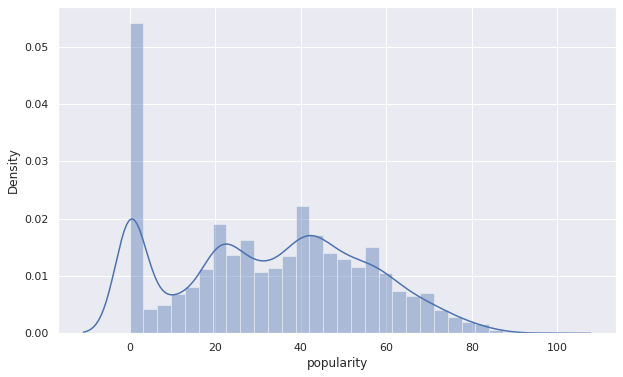

In [64]:
sns.distplot(testing_data[testing_data["explicit"]==False]['popularity'])

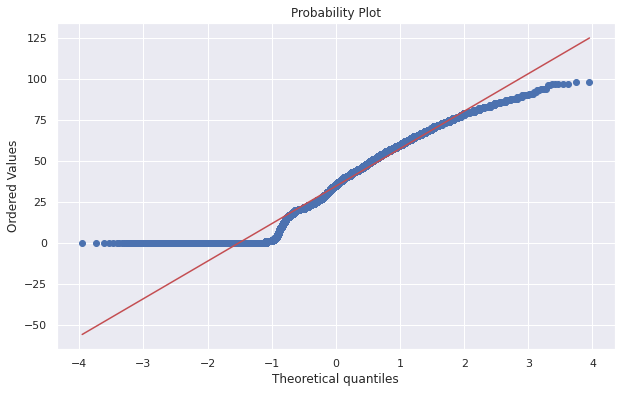

In [65]:
import numpy as np 
import pylab 
import scipy.stats as stats
                   
stats.probplot(testing_data['popularity'], dist="norm", plot=pylab)
pylab.show()

# Let's do a ttest if popularity is affected by explicit

In [66]:
print("TRUE MEAN:",np.round(testing_data[testing_data["explicit"]==True]['popularity'].mean(),2))
print("FALSE MEAN:", np.round(testing_data[testing_data["explicit"]==False]['popularity'].mean(),2))

TRUE MEAN: 36.43
FALSE MEAN: 32.83


## T-TEST

### HYPOTHESIS

#### NULL HYPTOHESES (H0): The sample means are same for two categories

#### ALTERNATE HYPOTHESIS (H1) : The population means are differnet between two categories

Significance value:  0.05

In [67]:
# Importing libraries for one way anova test
import scipy.stats 
from scipy.stats import ttest_ind, levene


group1 = [x for x in testing_data[testing_data["explicit"]==True]['popularity']]
group2 = [x for x in testing_data[testing_data["explicit"]==False]['popularity']]


# Checking for equal variances to perform independent ttest
statistic, pvalue = scipy.stats.levene(group1, group2)


equal_var_ = True
if pvalue<0.05:
  equal_var_=False
else:
  equal_var_=True


# ttest value 
statistic, p_value = ttest_ind(group1, group2, equal_var=equal_var_)

print("Test Result:\n Anova test statistic:",statistic,"pvalue:",p_value)

if p_value <0.05:
  print("We can reject the null hypothesis as enough evidence is present")
else:
  print("We cannot reject the null hypothesis as enough evidence supports the null hypothesis")

Test Result:
 Anova test statistic: 10.370407545415892 pvalue: 3.9841972321871975e-25
We can reject the null hypothesis as enough evidence is present


### RESULTS : We can conclude that difference in means for two groups is statistically significant. 

In [89]:
# Creating two groups for explicit categories populairty


group1 = [x for x in data[data["explicit"]==True]['popularity']]
group2 = [x for x in data[data["explicit"]==False]['popularity']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


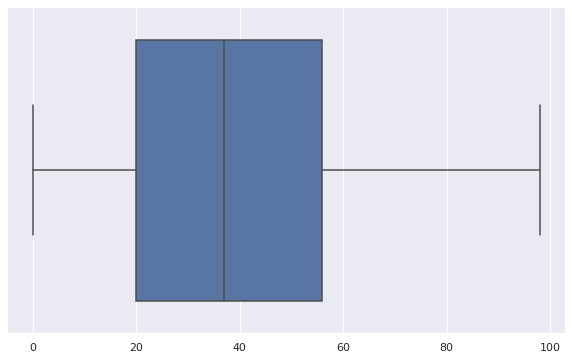

In [91]:
sns.boxplot(group1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


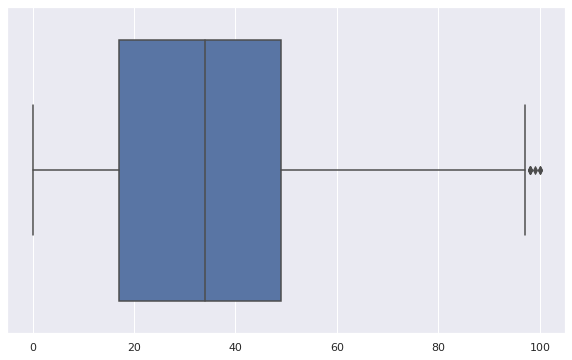

In [90]:
sns.boxplot(group2)

## EXPLORING AND COMPARING NUMERIC VARIABLES

In [ ]:
numerical_columns

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
""" 
Although we key and mode values consists of number, we cannot really interpret them as numerical variables because they are categories, where each category 
is a numeric value. So, we will change our lists necessarily. 
"""

# Appending values into categorical columns 
categorical_columns.append("key")
categorical_columns.append("mode")
categorical_columns.append("explicit")

# Removing values from numerical_columns
numerical_columns.remove("key")
numerical_columns.remove("mode")
numerical_columns.remove("explicit")

### OUTLIERS

We are going to deal with outliers in this section 

In [ ]:
for cols in numerical_columns:
  print(cols,"\nMin value:",min(data[cols]),"Max value:",max(data[cols]),"Range:",max(data[cols])-min(data[cols]),"\n")

popularity 
Min value: 0 Max value: 100 Range: 100 

duration_ms 
Min value: 8586 Max value: 5237295 Range: 5228709 

danceability 
Min value: 0.0 Max value: 0.985 Range: 0.985 

energy 
Min value: 0.0 Max value: 1.0 Range: 1.0 

loudness 
Min value: -49.531 Max value: 4.532 Range: 54.063 

speechiness 
Min value: 0.0 Max value: 0.965 Range: 0.965 

acousticness 
Min value: 0.0 Max value: 0.996 Range: 0.996 

instrumentalness 
Min value: 0.0 Max value: 1.0 Range: 1.0 

liveness 
Min value: 0.0 Max value: 1.0 Range: 1.0 

valence 
Min value: 0.0 Max value: 0.995 Range: 0.995 

tempo 
Min value: 0.0 Max value: 243.372 Range: 243.372 

time_signature 
Min value: 0 Max value: 5 Range: 5 



0         False
1         False
2         False
3         False
4         False
          ...  
113995    False
113996    False
113997    False
113998    False
113999    False
Name: explicit, Length: 113999, dtype: bool